# Descarga de datos NOAA

## Datos cada 6 horas

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/ncep.reanalysis2/pressure'
ftp.cwd(path)
#ftp.nlst()

In [ ]:
filename1 = 'uwnd.2017.nc'
filename2 = 'vwnd.2017.nc'
ftp.retrbinary("RETR " + filename1, open(filename1, 'wb').write)
ftp.retrbinary("RETR " + filename2, open(filename2, 'wb').write)
ftp.close()

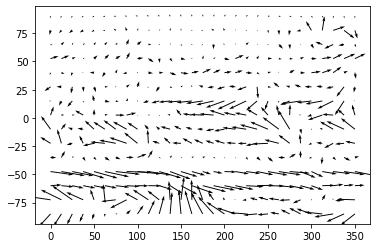

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

dset1 = xr.open_dataset(filename1)
dset2 = xr.open_dataset(filename2)
slevel_uwnd = dset1.sel(level=1000)
slevel_vwnd = dset2.sel(level=1000)
slevel_uwnd_mean = slevel_uwnd.mean(dim='time')
slevel_vwnd_mean = slevel_vwnd.mean(dim='time')
plt.quiver(slevel_uwnd_mean.lon[::5], slevel_uwnd_mean.lat[::5],
          slevel_uwnd_mean.uwnd[::5,::5], slevel_vwnd_mean.vwnd[::5,::5])


## Promedio mensual

### Climatología (1981-2010)

#### Descarga de datos

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/ncep.reanalysis2.derived/pressure'
ftp.cwd(path)
#ftp.nlst()

'250 Directory successfully changed.'

In [ ]:
filename1 = 'uwnd.mon.mean.nc'
filename2 = 'vwnd.mon.mean.nc'
ftp.retrbinary("RETR " + filename1, open(filename1, 'wb').write)
ftp.retrbinary("RETR " + filename2, open(filename2, 'wb').write)
ftp.close()

## Graficas climatologicas (1981-2010) comportamiento u-wind

In [ ]:
import xarray as xr
dset = xr.open_dataset(filename1)
dset_sel1 = dset.uwnd.sel(level=850, time=slice("1981-09-01","2010-09-01",12))
dset_sel2 = dset.uwnd.sel(level=850, time=slice("1981-10-01","2010-10-01",12))
dset_sel3 = dset.uwnd.sel(level=850, time=slice("1981-11-01","2010-11-01",12))
dset_sel4 = dset.uwnd.sel(level=850, time=slice("1981-12-01","2010-12-01",12))

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

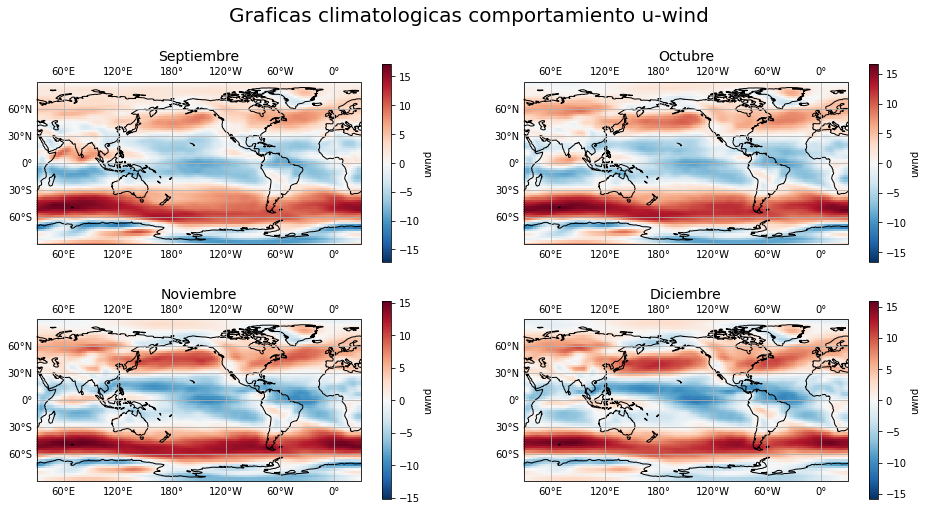

In [ ]:
fig = plt.figure(figsize=(16,8))
fig.suptitle("Graficas climatologicas comportamiento u-wind", fontsize=20)
ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=210))
dset_sel1.mean(dim=['time']).plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(ccrs.PlateCarree(), draw_labels=True)
ax1.set_title("Septiembre", fontsize=14)

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=210))
dset_sel2.mean(dim=['time']).plot(ax=ax2, transform=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(ccrs.PlateCarree(), draw_labels=True)
ax2.set_title("Octubre", fontsize=14)

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=210))
dset_sel3.mean(dim=['time']).plot(ax=ax3, transform=ccrs.PlateCarree())
ax3.coastlines()
ax3.gridlines(ccrs.PlateCarree(), draw_labels=True)
ax3.set_title("Noviembre", fontsize=14)

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=210))
dset_sel4.mean(dim=['time']).plot(ax=ax4, transform=ccrs.PlateCarree())
ax4.coastlines()
ax4.gridlines(ccrs.PlateCarree(), draw_labels=True)
ax4.set_title("Diciembre", fontsize=14)

fig.savefig("Comportamiento_climatologico_uwnd_sept-dic", bbox_inches='tight', dpi=500)

In [ ]:
import xarray as xr
dset1 = xr.open_dataset(filename1)
dset2 = dset1.uwnd.sel(time=slice("2014-01-01","2014-07-01"), lon=slice(130,280), lat=slice(5,-5), level=850)

for x in range(7):
  month_norm = dset1.uwnd.sel(time=slice(f"1981-{x+1}-01","2010-12-01",12), lon=slice(130,280),
                           lat=slice(5,-5), level=850).mean(dim='time')
  dset2[x] = dset2[x] - month_norm

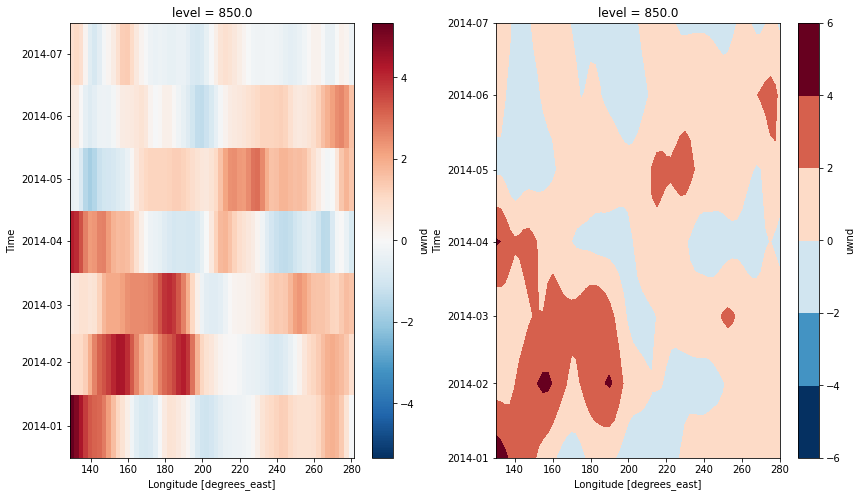

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
dset2.mean(dim='lat').plot()
ax2 = fig.add_subplot(122)
dset2.mean(dim='lat').plot.contourf()
plt.savefig("Prueba_Uwind_anom", bbox_inches='tight', dpi=500)

## Datos Diarios

### Componente u

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/ncep.reanalysis2.dailyavgs/pressure'
ftp.cwd(path)
#ftp.nlst()
for x in range(30):
  filename = f'uwnd.{x+1981}.nc'
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

for x in range(4):
  filename = f'uwnd.{x+2014}.nc'
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
ftp.close()

In [ ]:
import xarray as xr
import pandas as pd
filename = 'uwnd.2017.nc'
dset = xr.open_dataset(filename)
dset_sel = dset.uwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=slice("2017-01-01","2017-12-31"))

#Borrar el 29 de feb de los años bisiestos
if int(filename[5:9])%4==0:
  dset_sel = dset_sel.drop_isel(time=59)

In [ ]:
dset

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 365)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          mean Daily NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2017/07 by NOAA/ESRL/PSD\nConverted to chunked, d...

In [ ]:
drange = []
dset_u2017 = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=dset_sel.time,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
x=0
for month in range(12):
  if month==0 or month==2 or month==4 or month==6 or month==7 or month==9 or month==11:
    for day in range(31):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      #print(darray)
      for year in range(30):
          filename = f'uwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.uwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          #print(darray)
          dset_u2017[x] = dset_sel[x] - darray.mean(dim='time')
          #print(dset_u2017)
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]

  elif month==1:
    for day in range(28):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      for year in range(30):
          filename = f'uwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.uwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          dset_u2017[x] = dset_sel[x] - darray.mean(dim='time')
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]
  else:
    for day in range(30):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      for year in range(30):
          filename = f'uwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.uwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          dset_u2017[x] = dset_sel[x] - darray.mean(dim='time')
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]

In [ ]:
time = pd.date_range("2014-01-01","2017-12-31")
range_date = time.delete(789)
dset_anom_ufull = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                                lat=dset_sel.lat, lon=dset_sel.lon))

for x in range(365):
  dset_anom_ufull[x] = dset_u2014[x]

for x in range(365):
  dset_anom_ufull[x+365] = dset_u2015[x]

for x in range(365):
  dset_anom_ufull[x+730] = dset_u2016[x]

for x in range(365):
  dset_anom_ufull[x+1095] = dset_u2017[x]

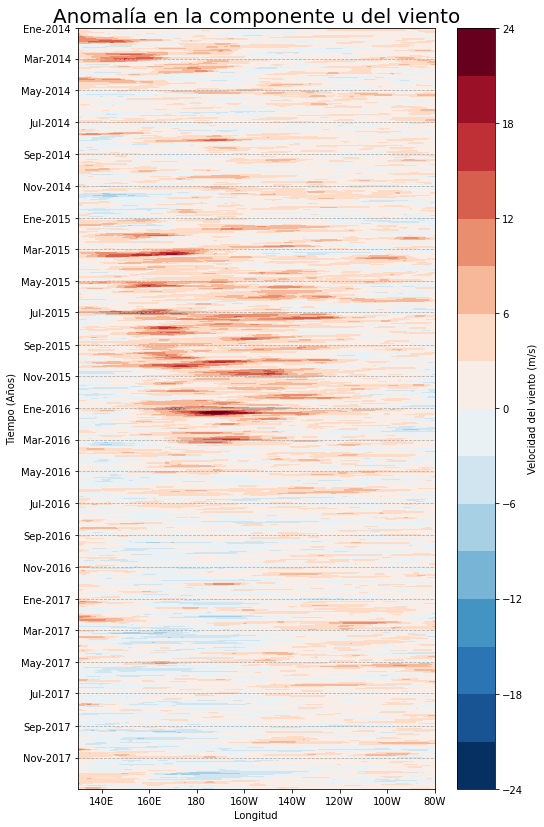

In [ ]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(111)
im = dset_anom_ufull.mean(dim='lat').plot.contourf(ax=ax, yincrease=False, levels=18, add_colorbar=False)

ax.set_title("Anomalía en la componente u del viento", fontsize=20)
ax.set(xlabel="Longitud", ylabel="Tiempo (Años)")

# Crear los valores del eje y y sus labels en formato Mes-Año
yticks_values = pd.date_range("2014-01-01","2017-12-01", freq='2MS')
yticks_labels = []

year = 2014
temp = ''
while temp != 'Nov-2017':
  lst_mon = ['Ene', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
  for i in range(6):
    temp = lst_mon[i] +'-'+ str(year)
    yticks_labels.append(temp)
  year += 1


# Crear los valores del eje x y sus labels
lon_inicial = 140
xticks_values = []
while True:
  xticks_values.append(lon_inicial)
  if lon_inicial == 280:
    break
  lon_inicial += 20
xticks_labels = ['140E', '160E', '180', '160W', '140W', '120W', '100W', '80W']

plt.yticks(yticks_values, yticks_labels)
plt.xticks(xticks_values, xticks_labels)
ax.grid(True, axis='y', linestyle = '--')
cb = plt.colorbar(im)
cb.set_label('Velocidad del viento (m/s)')
plt.savefig("Anom_uwnd_Hov", bbox_inches='tight', dpi=500)

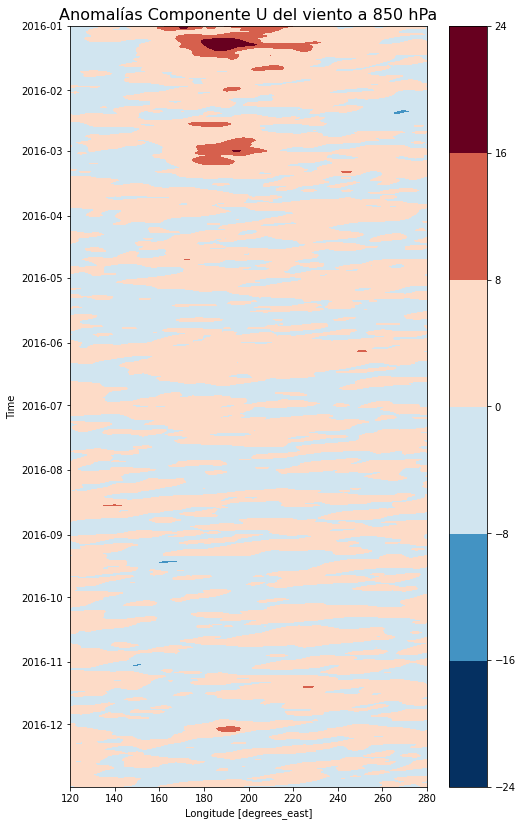

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,14))
#ax1 = fig.add_subplot(121)
#dset2.mean(dim='lat').plot(ax=ax1, yincrease=False)
ax2 = fig.add_subplot(111)
dset2.mean(dim='lat').plot.contourf(ax=ax2, yincrease=False)
ax2.set_title("Anomalías Componente U del viento a 850 hPa", fontsize=16)
plt.savefig("Hov_Uwnd_anom_2016", bbox_inches='tight', dpi=500)

### Componente v

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/ncep.reanalysis2.dailyavgs/pressure'
ftp.cwd(path)
#ftp.nlst()
for x in range(30):
  filename = f'vwnd.{x+1981}.nc'
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)

for x in range(4):
  filename = f'vwnd.{x+2014}.nc'
  ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
#ftp.close()

In [ ]:
import xarray as xr
import pandas as pd
filename = 'vwnd.2017.nc'
dset = xr.open_dataset(filename)
dset_sel = dset.vwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=slice("2017-01-01","2017-12-31"))

#Borrar el 29 de feb de los años bisiestos
if int(filename[5:9])%4==0:
  dset_sel = dset_sel.drop_isel(time=59)

In [ ]:
drange = []
dset_v2017 = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=dset_sel.time,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
x=0
for month in range(12):
  if month==0 or month==2 or month==4 or month==6 or month==7 or month==9 or month==11:
    for day in range(31):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      #print(darray)
      for year in range(30):
          filename = f'vwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.vwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          #print(darray)
          dset_v2017[x] = dset_sel[x] - darray.mean(dim='time')
          #print(dset_v2017)
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]

  elif month==1:
    for day in range(28):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      for year in range(30):
          filename = f'vwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.vwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          dset_v2017[x] = dset_sel[x] - darray.mean(dim='time')
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]
  else:
    for day in range(30):
      for year in range(30):
          drange.append(f'{year+1981}-{month+1}-{day+1}')
      range_date = pd.DatetimeIndex(drange)
      darray = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                       lat=dset_sel.lat, lon=dset_sel.lon))
      for year in range(30):
          filename = f'vwnd.{year+1981}.nc'
          dset = xr.open_dataset(filename)
          darray[year] = dset.vwnd.sel(level=850, lon=slice(130,280), lat=slice(5,-5), time=f'{year+1981}-{month+1}-{day+1}')
          dset_v2017[x] = dset_sel[x] - darray.mean(dim='time')
      #print("Termino el proceso ", x)
      x+=1
      #print(drange)
      drange=[]

In [ ]:
time = pd.date_range("2014-01-01","2017-12-31")
range_date = time.delete(789)
dset_anom_vfull = xr.DataArray(data=0.0, dims=['time','lat','lon'], coords=dict(time=range_date,
                                                                                lat=dset_sel.lat, lon=dset_sel.lon))

for x in range(365):
  dset_anom_vfull[x] = dset_v2014[x]

for x in range(365):
  dset_anom_vfull[x+365] = dset_v2015[x]

for x in range(365):
  dset_anom_vfull[x+730] = dset_v2016[x]

for x in range(365):
  dset_anom_vfull[x+1095] = dset_v2017[x]

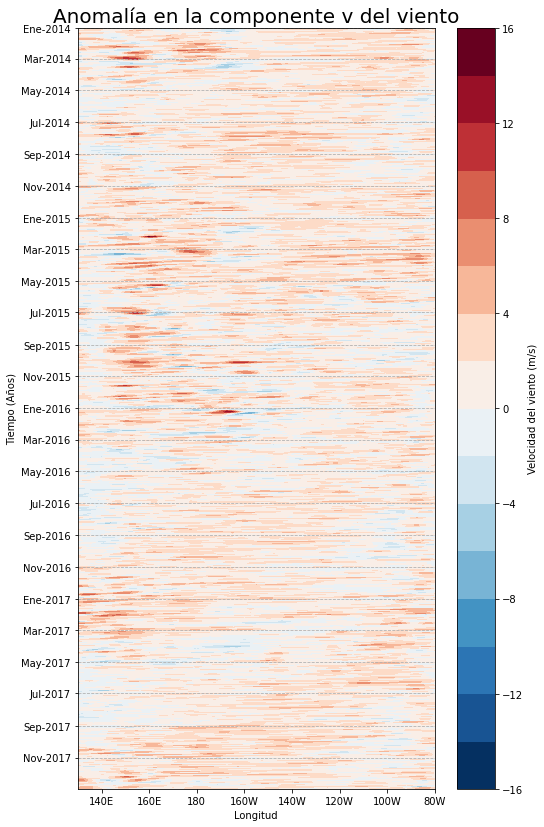

In [ ]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(111)
im = dset_anom_vfull.mean(dim='lat').plot.contourf(ax=ax, yincrease=False, levels=18, add_colorbar=False)

ax.set_title("Anomalía en la componente v del viento", fontsize=20)
ax.set(xlabel="Longitud", ylabel="Tiempo (Años)")

# Crear los valores del eje y y sus labels en formato Mes-Año
yticks_values = pd.date_range("2014-01-01","2017-12-01", freq='2MS')
yticks_labels = []

year = 2014
temp = ''
while temp != 'Nov-2017':
  lst_mon = ['Ene', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
  for i in range(6):
    temp = lst_mon[i] +'-'+ str(year)
    yticks_labels.append(temp)
  year += 1


# Crear los valores del eje x y sus labels
lon_inicial = 140
xticks_values = []
while True:
  xticks_values.append(lon_inicial)
  if lon_inicial == 280:
    break
  lon_inicial += 20
xticks_labels = ['140E', '160E', '180', '160W', '140W', '120W', '100W', '80W']

plt.yticks(yticks_values, yticks_labels)
plt.xticks(xticks_values, xticks_labels)
ax.grid(True, axis='y', linestyle = '--')
cb = plt.colorbar(im)
cb.set_label('Velocidad del viento (m/s)')
plt.savefig("Anom_vwnd_Hov", bbox_inches='tight', dpi=500)

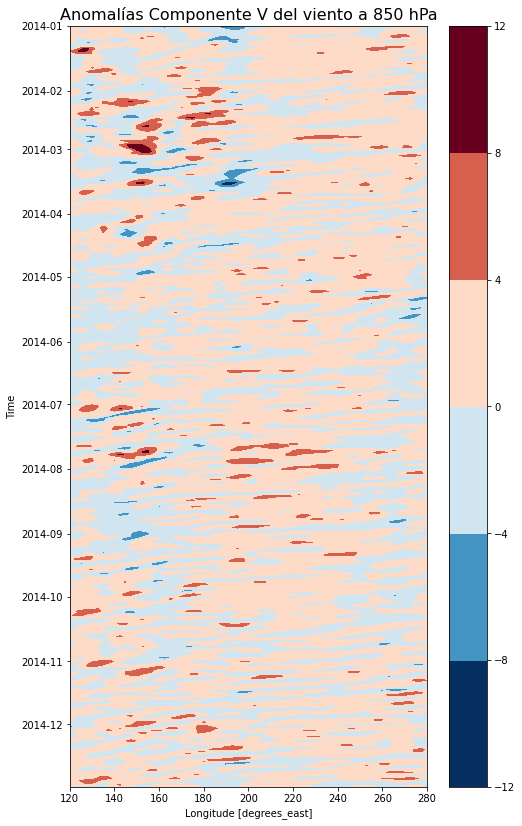

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,14))
#ax1 = fig.add_subplot(121)
#dset2.mean(dim='lat').plot(ax=ax1, yincrease=False)
ax2 = fig.add_subplot(111)
dset2.mean(dim='lat').plot.contourf(ax=ax2, yincrease=False)
ax2.set_title("Anomalías Componente V del viento a 850 hPa", fontsize=16)
plt.savefig("Hov_Vwnd_anom_2014", bbox_inches='tight', dpi=500)

In [ ]:
!pip install cartopy
!pip install --no-binary shapely shapely --force

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Mezcla con datos de temperatura

In [ ]:
from ftplib import FTP
host = 'ftp2.psl.noaa.gov'
ftp = FTP(host)
ftp.login()
path = '/Datasets/noaa.ersst.v5'
ftp.cwd(path)
filename = 'sst.mnmean.nc'
#ftp.size(filename)
ftp.retrbinary("RETR " + filename, open(filename, 'wb').write)
ftp.close()

In [ ]:
def month_normal(month):
  """
  Introduce el mes en número pe
  """
  month = str(month)
  dset = xr.open_dataset(filename)
  month_sel = dset.sst.sel(time=slice(("1981-"+month+"-01"),"2010-12-01",12))
  month_normal = month_sel.mean(dim='time')
  return month_normal

def plot_sstanom_wnd(year, month, level):
  """
  plot_sstanom_wnd(year, month, level)
  Plotea anomalías SST con dirección del viento (vectores normalizados)
  Insertar los datos en número
  Ejemplo : plot_sstanom_wnd(2017, 3, 1000)
  """
  dset = xr.open_dataset(filename)
  dset1 = xr.open_dataset(filename1)
  dset2 = xr.open_dataset(filename2)

  month_anom = dset.sst.sel(time=(str(year) + "-"+ str(month) + "-01")) - month_normal(month)
  month_uwnd = dset1.uwnd.sel(time=(str(year) + "-"+ str(month) + "-01"), level=level)
  month_vwnd = dset2.vwnd.sel(time=(str(year) + "-"+ str(month) + "-01"), level=level)
  norm_wnd = (month_uwnd[::1,::1]**2 + month_vwnd[::1,::1]**2)**(1/2)

  fig = plt.figure(figsize=(18,9))
  ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
  month_anom.plot(ax=ax, transform=ccrs.PlateCarree())
  plt.quiver(month_uwnd.lon[::1], month_vwnd.lat[::1], month_uwnd[::1,::1] / norm_wnd,
             month_vwnd[::1,::1] / norm_wnd, headwidth=2, headlength=5)
  ax.coastlines()
  ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
  ax.set_title("Anomalía SST y Dirección del Viento " + str(month) + "-" + str(year), fontsize=20)
  plt.savefig("Anomalía SST y Dirección del Viento " + str(month) + "-" + str(year), bbox_inches='tight', dpi=500)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

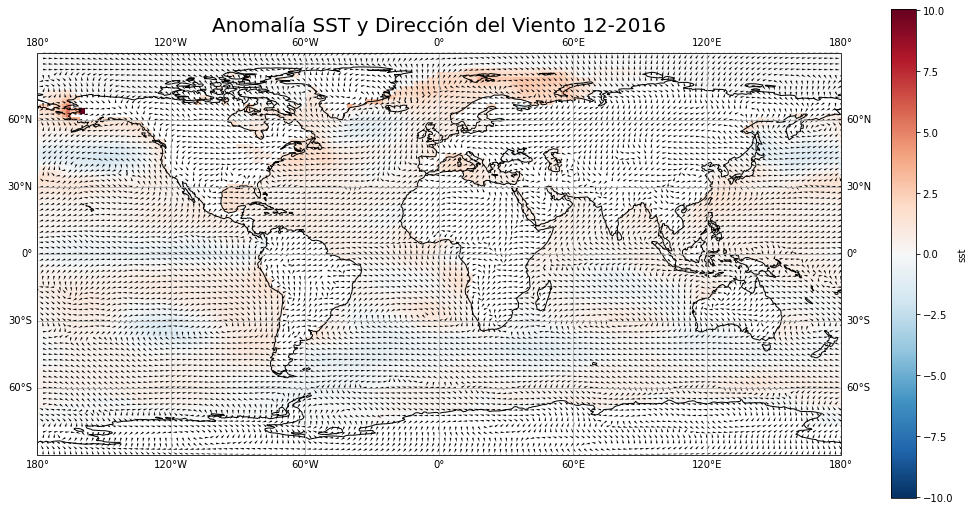

In [ ]:
plot_sstanom_wnd(2016,12,1000)
#for x in range(3):
#  plot_sstanom_wnd(2017,x+1,1000)

# Anomalías de Vientos

In [ ]:
xr.open_dataset('uwnd.mon.mean.nc')

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 515)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-11-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [ ]:
def plot_anom_wnd(year,month,level):
  """
  plot_anom_wnd(year,month,level)
  Inserte año, mes y nivel
  Plotea las anomalias de viento teniendo los vectores normalizados y el color representa la magnitud
  """
  dset1 = xr.open_dataset(filename1)
  dset2 = xr.open_dataset(filename2)

  month_sel_u = dset1.uwnd.sel(time=slice(f"1981-{month}-01","2010-12-01",12))
  month_norm_u = month_sel_u.mean(dim='time')
  month_sel_v = dset2.vwnd.sel(time=slice(f"1981-{month}-01","2010-12-01",12))
  month_norm_v = month_sel_v.mean(dim='time')

  month_anom_u = dset1.uwnd.sel(time=f'{year}-{month}-01') - month_norm_u
  month_anom_v = dset2.vwnd.sel(time=f'{year}-{month}-01') - month_norm_v
  month_magnitude = (month_anom_u.sel(level=level)**2 + month_anom_v.sel(level=level)**2)**(1/2)

  fig = plt.figure(figsize=(18,18))
  ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
  im = month_magnitude.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap='Reds')
  cb = plt.colorbar(im, orientation='vertical', shrink=0.4)
  cb.set_label("Velocidad de viento (m/s)")

  plt.quiver(month_anom_u.lon[::1],month_anom_u.lat[::1],
             month_anom_u.sel(level=level)[::1,::1]/month_magnitude,
             month_anom_v.sel(level=level)[::1,::1]/month_magnitude, headwidth=2, headlength=5)

  ax.coastlines()
  ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
  ax.set_title(f'Anomalía del Viento {month}/{year} a {level} mb', fontsize=20)
  plt.savefig(f'Anom_viento_{month}-{year}_{level}mb', dpi=500, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

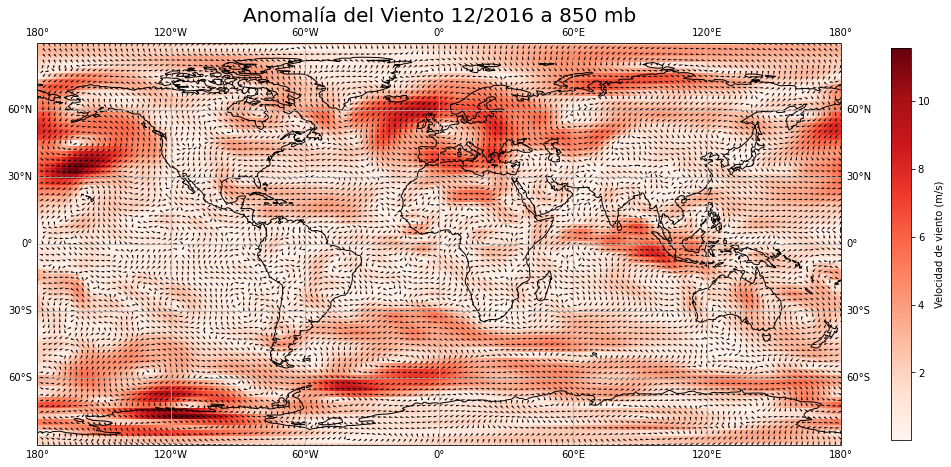

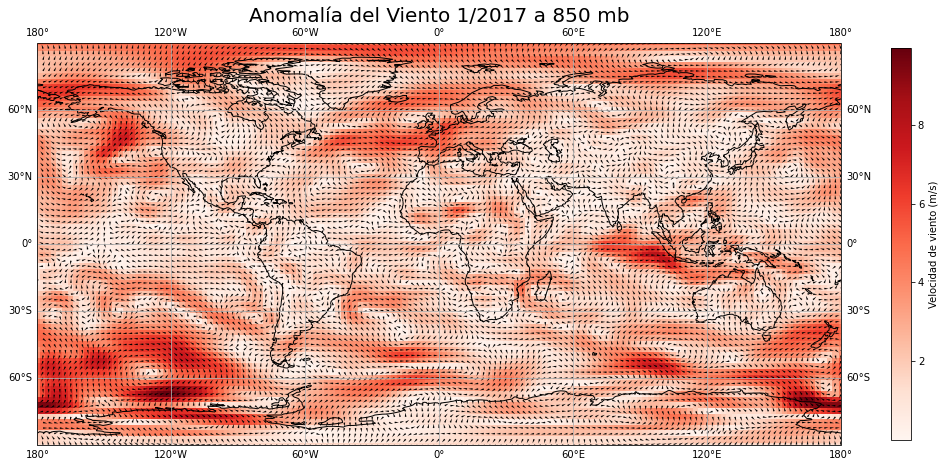

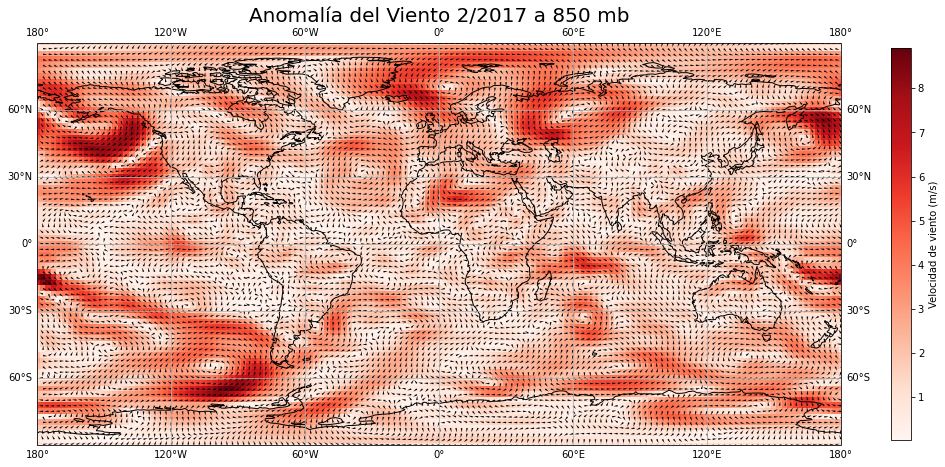

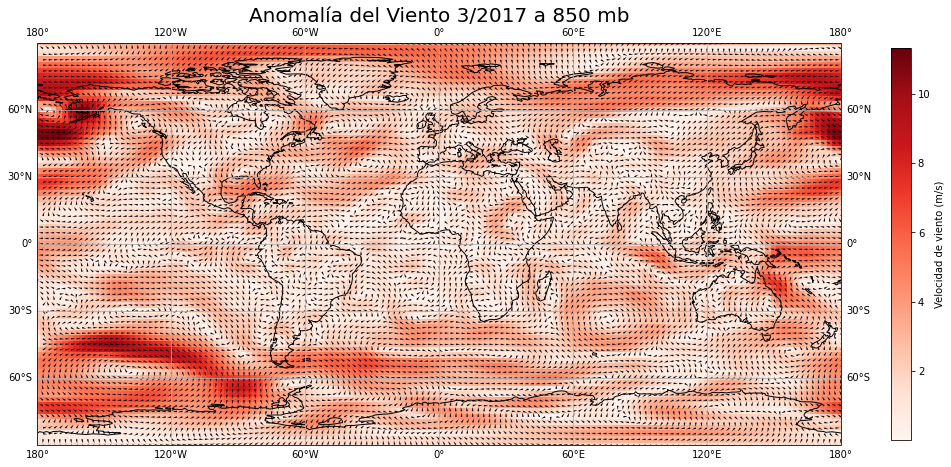

In [ ]:
plot_anom_wnd(2016,12,850)
for x in range(3):
  plot_anom_wnd(2017,x+1,850)

In [ ]:
with open(filename) as f:
    long_description = f.read()

UnicodeDecodeError: ignored